In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [2]:
#load the entire training data
df = pd.read_csv("C:\\Users\\682146\\Desktop\\work\\Python JPA\\Assignments\\SVM\\train.csv")

In [3]:
#consider only 20% of the training data for building the model
df_sample = df.sample(9600)

In [4]:
df_sample.shape

(9600, 785)

In [5]:
df_sample.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [6]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9600 entries, 18708 to 8247
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 57.6 MB


In [7]:
df_sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
18708,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36379,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10678,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27588,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40878,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#list the number of unique digits in the "label" column

order = list(np.sort(df_sample['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [9]:
# there are no missing values in the dataset 
df_sample.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [10]:
digit_means = df_sample.groupby('label').mean()
digit_means.head(20)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.839594,0.451777,0.202030,0.080203,0.257868,0.058883,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [11]:
# average feature values
round(df_sample.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.02
pixel14     0.02
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.02
pixel762    0.05
pixel763    0.07
pixel764    0.09
pixel765    0.13
pixel766    0.20
pixel767    0.25
pixel768    0.32
pixel769    0.39
pixel770    0.67
pixel771    0.61
pixel772    0.55
pixel773    0.34
pixel774    0.19
pixel775    0.06
pixel776    0.09
pixel777    0.06
pixel778    0.03
pixel779    0.01
pixel780    0.00
pixel781    0.

In [12]:
# let's look at the statistics for label variable 

df_sample['label'].describe()

count    9600.000000
mean        4.435937
std         2.880446
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: label, dtype: float64

In [13]:
# splitting into X and y
X = df_sample.drop("label", axis = 1)
y = df_sample['label']

In [14]:
# scaling the features
X_scaled = scale(X)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 105)

In [15]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

In [16]:
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[188   0   0   2   1   0   3   0   1   0]
 [  0 186   2   0   0   0   0   0   1   0]
 [  4   1 186   5   2   0   1   1   2   0]
 [  0   0   5 184   0   9   2   2   2   0]
 [  0   1   2   0 170   0   0   3   0   5]
 [  2   2   5   7   3 179   4   0   1   0]
 [  1   1   1   0   0   1 168   0   0   0]
 [  0   1   1   2   2   0   0 188   0   6]
 [  3   4   5   5   1  10   1   1 164   2]
 [  0   0   0   2   7   1   0  10   0 158]]


In [17]:
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred, average='macro'))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred,average='macro'))


accuracy 0.9223958333333333
precision 0.9233554241919653
recall 0.9233101659465254


In [18]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="linear")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 27.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [19]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.936490,1.734764,4.501676,0.536192,1,0.01,"{'C': 1, 'gamma': 0.01}",0.912109,0.915365,0.909505,...,0.910286,0.005667,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,10.677489,1.090825,4.130981,0.288041,1,0.001,"{'C': 1, 'gamma': 0.001}",0.912109,0.915365,0.909505,...,0.910286,0.005667,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,9.843193,0.669117,3.939274,0.695286,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.912109,0.915365,0.909505,...,0.910286,0.005667,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,9.431480,0.449077,4.169294,0.827596,10,0.01,"{'C': 10, 'gamma': 0.01}",0.912109,0.915365,0.909505,...,0.910286,0.005667,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,10.078875,1.418530,3.960453,0.421526,10,0.001,"{'C': 10, 'gamma': 0.001}",0.912109,0.915365,0.909505,...,0.910286,0.005667,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
5,9.333069,0.647439,3.563322,0.095075,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.912109,0.915365,0.909505,...,0.910286,0.005667,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
6,8.295371,0.259089,3.353159,0.026097,100,0.01,"{'C': 100, 'gamma': 0.01}",0.912109,0.915365,0.909505,...,0.910286,0.005667,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7,8.253616,0.112053,3.449385,0.250292,100,0.001,"{'C': 100, 'gamma': 0.001}",0.912109,0.915365,0.909505,...,0.910286,0.005667,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
8,8.326429,0.335307,3.372549,0.082251,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.912109,0.915365,0.909505,...,0.910286,0.005667,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
9,8.173594,0.138026,3.327883,0.040215,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.912109,0.915365,0.909505,...,0.910286,0.005667,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [20]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9102864583333333 corresponding to hyperparameters {'C': 1, 'gamma': 0.01}


In [21]:
# model with optimal hyperparameters

# model
model = SVC(C=1, gamma=0.01, kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
# precision
print("precision", metrics.precision_score(y_test, y_pred, average='macro'))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred,average='macro'))

#confusion matrix
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9223958333333333 

precision 0.9233554241919653
recall 0.9233101659465254
[[188   0   0   2   1   0   3   0   1   0]
 [  0 186   2   0   0   0   0   0   1   0]
 [  4   1 186   5   2   0   1   1   2   0]
 [  0   0   5 184   0   9   2   2   2   0]
 [  0   1   2   0 170   0   0   3   0   5]
 [  2   2   5   7   3 179   4   0   1   0]
 [  1   1   1   0   0   1 168   0   0   0]
 [  0   1   1   2   2   0   0 188   0   6]
 [  3   4   5   5   1  10   1   1 164   2]
 [  0   0   0   2   7   1   0  10   0 158]] 



In [22]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [23]:
# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[190   0   0   0   0   0   3   0   2   0]
 [  0 184   2   1   0   0   0   1   1   0]
 [  1   0 193   1   0   1   2   1   2   1]
 [  0   0   7 194   0   2   0   1   0   0]
 [  0   0   2   0 172   0   1   3   0   3]
 [  1   1   3   5   2 185   4   0   2   0]
 [  1   0   7   0   0   0 164   0   0   0]
 [  0   0   3   0   1   0   0 191   0   5]
 [  1   2   6   8   0   7   1   2 167   2]
 [  0   0   0   1   2   0   0   3   2 170]]


In [24]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# precision
print("precision", metrics.precision_score(y_test, y_pred, average='macro'))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred,average='macro'))


accuracy: 0.9427083333333334 

precision 0.9443865966824049
recall 0.9431521545165108


In [25]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 72.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [26]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,72.713445,2.421868,8.896503,0.193449,1,0.01,"{'C': 1, 'gamma': 0.01}",0.742839,0.750651,0.740885,...,0.741276,0.009008,12,1.000000,1.000000,1.000000,0.999837,1.000000,0.999967,0.000065
1,21.145151,1.908222,5.429027,0.164120,1,0.001,"{'C': 1, 'gamma': 0.001}",0.934896,0.930339,0.927734,...,0.929297,0.004669,4,0.970378,0.973145,0.974447,0.970052,0.972982,0.972201,0.001702
2,29.555697,1.056006,7.616066,0.343548,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.912760,0.899089,0.893229,...,0.898698,0.007464,8,0.913900,0.915039,0.916667,0.916178,0.916992,0.915755,0.001140
3,78.013663,2.176063,9.252429,0.438819,10,0.01,"{'C': 10, 'gamma': 0.01}",0.763672,0.761719,0.757812,...,0.759766,0.006272,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,15.987835,0.484013,5.006246,0.373428,10,0.001,"{'C': 10, 'gamma': 0.001}",0.944010,0.947917,0.939453,...,0.940885,0.005199,3,0.999186,0.999349,0.999023,0.999349,0.999349,0.999251,0.000130
5,12.099827,0.067021,4.432169,0.049743,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.925781,0.929036,0.919271,...,0.922656,0.004146,5,0.959310,0.959310,0.960775,0.959961,0.961751,0.960221,0.000936
6,73.181632,0.792028,8.883555,0.095845,100,0.01,"{'C': 100, 'gamma': 0.01}",0.763672,0.761719,0.757812,...,0.759766,0.006272,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,15.450596,0.152625,4.834838,0.162683,100,0.001,"{'C': 100, 'gamma': 0.001}",0.945312,0.948568,0.939453,...,0.941016,0.005441,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,9.299731,0.127546,3.709977,0.091932,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.923828,0.931641,0.915365,...,0.922396,0.006291,6,0.995117,0.994141,0.996094,0.994303,0.995605,0.995052,0.000747
9,73.058059,0.929508,8.883598,0.188364,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.763672,0.761719,0.757812,...,0.759766,0.006272,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


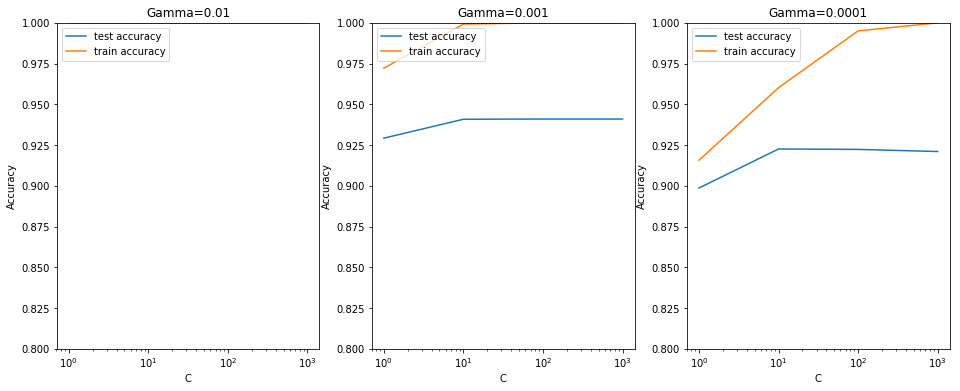

In [27]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [28]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.941015625 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


In [31]:
# model with optimal hyperparameters

# model
model = SVC(C=100, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")

# precision
print("precision", metrics.precision_score(y_test, y_pred, average='macro'))

# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred,average='macro'))

#Confusion metrix
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9526041666666667 

precision 0.9539318395615286
recall 0.9530533668615181
[[191   0   0   0   0   0   2   0   2   0]
 [  0 186   1   1   0   0   0   0   1   0]
 [  2   0 193   1   0   0   2   2   1   1]
 [  0   0   8 192   0   2   1   1   0   0]
 [  0   0   2   0 171   0   1   3   0   4]
 [  0   0   2   5   1 190   3   0   2   0]
 [  0   0   6   0   0   1 165   0   0   0]
 [  0   0   3   0   1   0   0 193   0   3]
 [  2   2   4   6   1   3   1   1 174   2]
 [  0   0   0   1   1   0   0   2   0 174]] 

